# **Startup Profit Prediction** 

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [ ]:
df = pd.read_csv('/content/50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Understanding the Data

In [ ]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
df.shape

(50, 5)

In [ ]:
df.size

250

In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.max()

R&D Spend            165349
Administration       182646
Marketing Spend      471784
State              New York
Profit               192262
dtype: object

In [ ]:
df.min()

R&D Spend                   0
Administration        51283.1
Marketing Spend             0
State              California
Profit                14681.4
dtype: object

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
df.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [ ]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

# Visualization

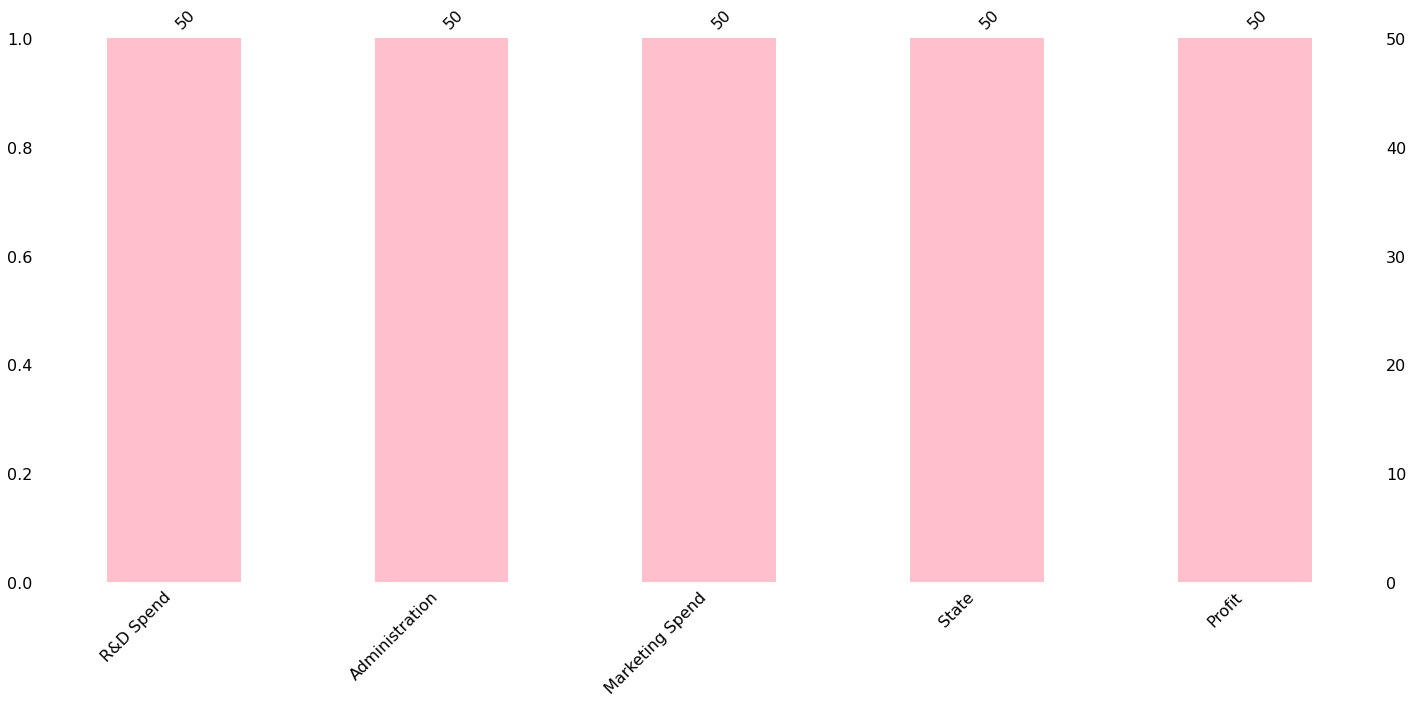

In [ ]:
import missingno as no
no.bar(df, color='pink')

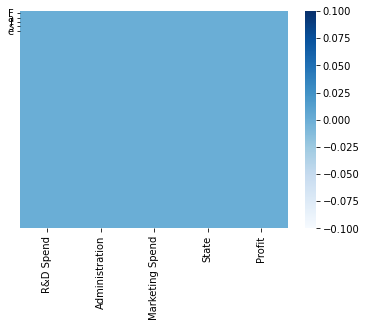

In [ ]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='Blues')

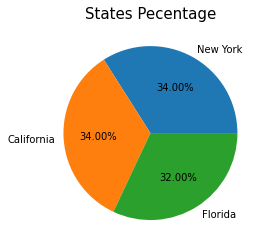

In [ ]:
df1 = df['State'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%')
plt.title('States Pecentage', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


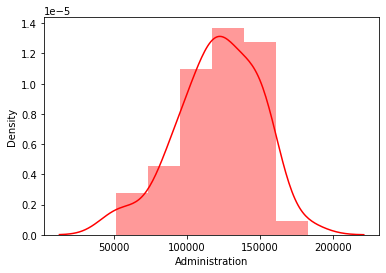

In [ ]:
sns.distplot(df['Administration'], color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


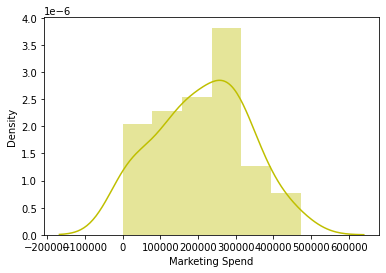

In [ ]:
sns.distplot(df['Marketing Spend'], color='y')

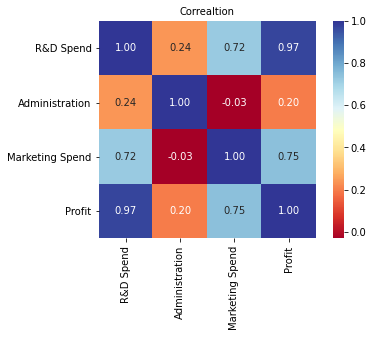

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True, cmap="RdYlBu")
plt.title("Correaltion", size=10)
plt.show()

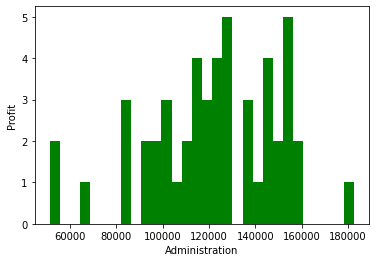

In [ ]:
plt.hist(df['Administration'],bins = 30, color='g')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

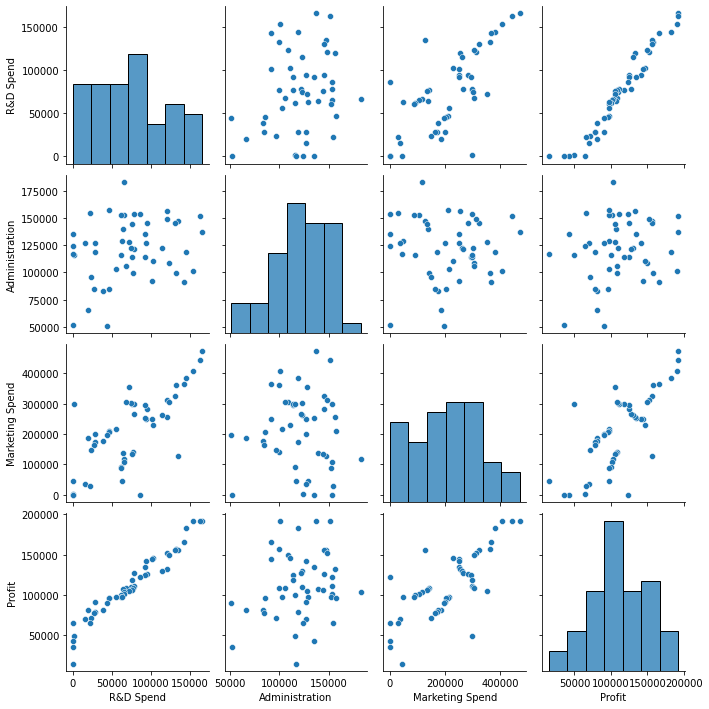

In [ ]:
sns.pairplot(df)

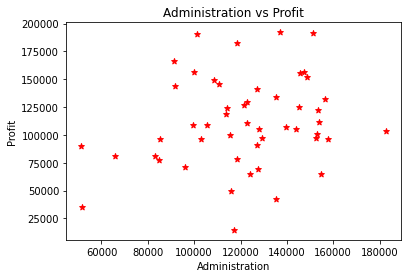

In [ ]:
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.title("Administration vs Profit")
plt.scatter(df["Administration"], df.Profit, color="red", marker="*")
plt.show()

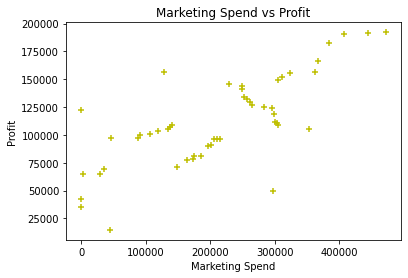

In [ ]:
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.title("Marketing Spend vs Profit")
plt.scatter(df["Marketing Spend"], df.Profit, color="y", marker="+")
plt.show()

# Splitting of Dataset into Dependent and Independent variables

In [ ]:
x = df.drop(["State","Profit"], axis=1)
y = df["Profit"]

# Training and Testing the Data

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Prediction

In [ ]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

# Performance

In [ ]:
df = pd.DataFrame(ypred_test, ytest)
df.head()

,0
Profit,
89949.14,89007.405245
108733.99,109563.176747
65200.33,65520.980396
71498.49,70626.906628
42559.73,47340.809988


# Accuracy

In [ ]:
from sklearn import metrics
print("Accuracy of training data:", metrics.r2_score(ytrain, ypred_train)*100)
ac = metrics.r2_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac)

Accuracy of training data: 93.83444814482027
Accuracy of testing data: 99.17459017235682


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, ypred_test)
print("Mean Square Error:", mse)

Mean Square Error: 14974326.96316168


# Plotting Regression Line

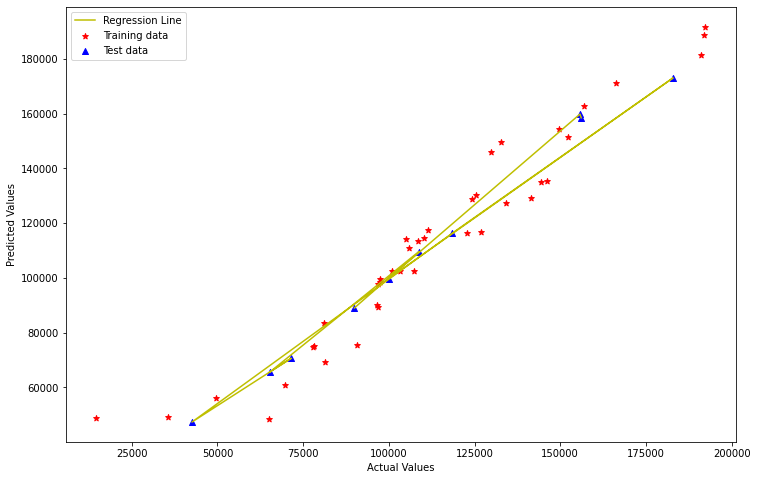

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(ytrain, ypred_train, c='r', marker='*')
plt.scatter(ytest, ypred_test, c='b', marker='^')
plt.plot(ytest, ypred_test, c='y', label = "Regression Line")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(['Regression Line', 'Training data', 'Test data'])
plt.show()

In [ ]:
p=model.predict([[167750,105145.55,437934.54]])
p

array([193349.02059275])

# Saving the Model

In [ ]:
import pickle 
pickle.dump(model, open('model.pkl', 'wb'))